In [1]:
print('hi')

hi


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
np.random.seed(42) #radnom number wont be generate

data = {
    'product_id' : range(1,21),
    'product_name':[f'Product{i}' for i in range(1,21)],
    'category' : np.random.choice(['Electronic','Clothing','Home','Sprots'],20),
    'unit_sold': np.random.poisson(lam=20, size=20),
    'sales_data': pd.date_range(start = '2023-01-01', periods=20, freq='D')

}
sales_data = pd.DataFrame(data)

print('Sales Data:')
print(sales_data)

Sales Data:
    product_id product_name    category  unit_sold sales_data
0            1     Product1        Home         25 2023-01-01
1            2     Product2      Sprots         15 2023-01-02
2            3     Product3  Electronic         17 2023-01-03
3            4     Product4        Home         19 2023-01-04
4            5     Product5        Home         21 2023-01-05
5            6     Product6      Sprots         17 2023-01-06
6            7     Product7  Electronic         19 2023-01-07
7            8     Product8  Electronic         16 2023-01-08
8            9     Product9        Home         21 2023-01-09
9           10    Product10    Clothing         21 2023-01-10
10          11    Product11        Home         17 2023-01-11
11          12    Product12        Home         22 2023-01-12
12          13    Product13        Home         14 2023-01-13
13          14    Product14        Home         17 2023-01-14
14          15    Product15      Sprots         17 2023-01

In [4]:
#save the dataframe to csv file

sales_data.to_csv('sales_data.csv', index=False)

In [5]:
import os
os.getcwd()

'c:\\Users\\aashutosh\\OneDrive\\Desktop\\pythonlib practices\\oops\\eda_llm_integration\\statistics'

In [6]:
descriptive_stats = sales_data['unit_sold'].describe()

print('\nDescriptive statistic for units sold:')
print(descriptive_stats)

mean_sales = sales_data['unit_sold'].mean()
median_sales = sales_data['unit_sold'].median()
mode_sales = sales_data['unit_sold'].mode()[0]
variance_sales = sales_data['unit_sold'].var()
std_deviation_sales = sales_data['unit_sold'].std()
category_stats = sales_data.groupby('category')['unit_sold'].agg(['sum','mean','std']).reset_index()

print('\n Statistical analysis:')
print(f'Mean units sold: {mean_sales}')
print(f'Median units sold: {median_sales}')
print(f'Mode units sold: {mode_sales}')
print(f'variance units sold: {variance_sales}')
print(f'standard deviation units sold: {std_deviation_sales}')
print('\ncategory statistics')
print('category_stats')





Descriptive statistic for units sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: unit_sold, dtype: float64

 Statistical analysis:
Mean units sold: 18.8
Median units sold: 18.5
Mode units sold: 17
variance units sold: 10.90526315789474
standard deviation units sold: 3.3023117899275864

category statistics
category_stats


In [7]:
confidence_level = 0.95

degrees_freedom = len(sales_data['unit_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['unit_sold']))

t_score = stats.t.ppf((1 + confidence_level)/2,degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print('\n confidence interval for mean of units sold')
print(confidence_interval)


 confidence interval for mean of units sold
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [8]:
t_statistic, p_value = stats.ttest_1samp(sales_data['unit_sold'],20)

print('\n Hypothesis testing (t-test):')
print(f't-statistic: {t_statistic}, p-value: {p_value}')

if p_value < 0.5:
    print('reject the null hypothesis: the mean units sold is different from 20')

else:
    print('fail to reject the null hypothesis: the mean units sold is not different from 20')
    


 Hypothesis testing (t-test):
t-statistic: -1.6250928099424466, p-value: 0.12061572226781002
reject the null hypothesis: the mean units sold is different from 20


In [12]:
sales_data

,product_id,product_name,category,unit_sold,sales_data
0,1,Product1,Home,25,2023-01-01
1,2,Product2,Sprots,15,2023-01-02
2,3,Product3,Electronic,17,2023-01-03
3,4,Product4,Home,19,2023-01-04
4,5,Product5,Home,21,2023-01-05
5,6,Product6,Sprots,17,2023-01-06
6,7,Product7,Electronic,19,2023-01-07
7,8,Product8,Electronic,16,2023-01-08
8,9,Product9,Home,21,2023-01-09
9,10,Product10,Clothing,21,2023-01-10


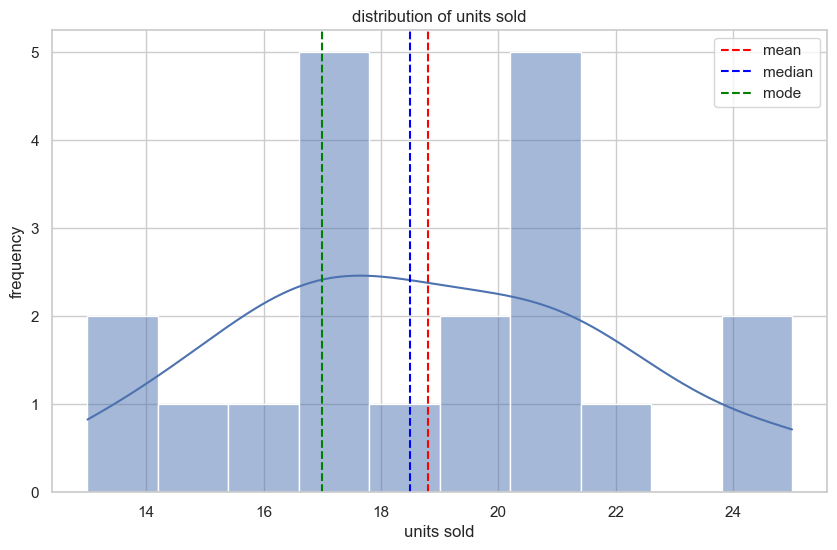

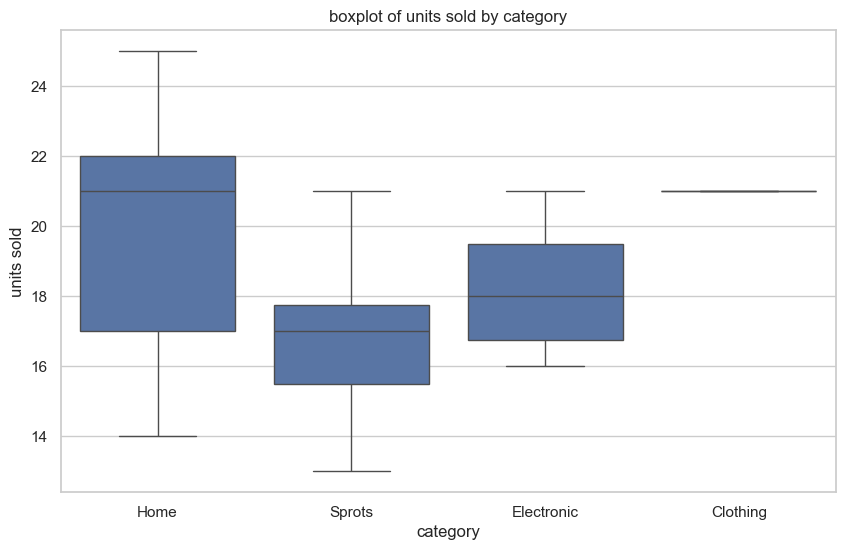

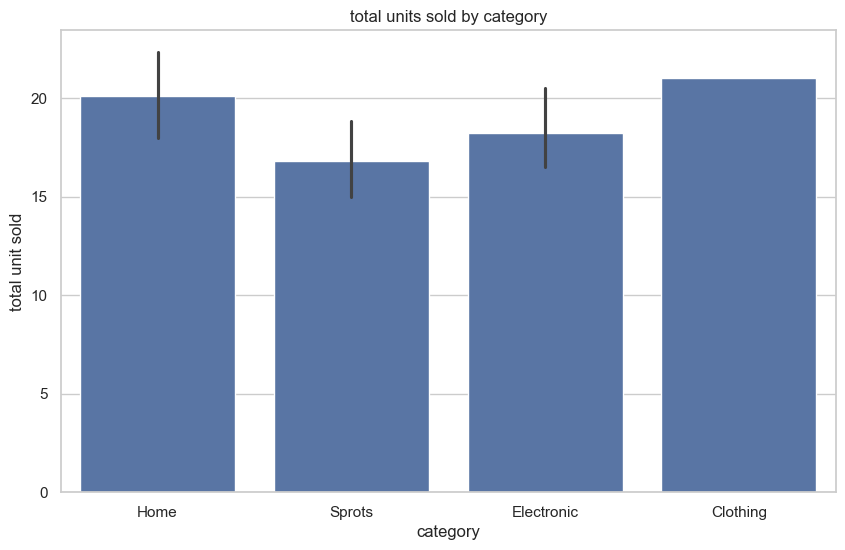

In [14]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.histplot(sales_data['unit_sold'], bins=10,kde=True)
plt.title('distribution of units sold')
plt.xlabel('units sold')
plt.ylabel('frequency')
plt.axvline(mean_sales, color='red', linestyle = '--', label ='mean')
plt.axvline(median_sales, color='blue', linestyle = '--', label ='median')
plt.axvline(mode_sales, color='green', linestyle = '--', label ='mode')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='unit_sold', data=sales_data)
plt.title('boxplot of units sold by category')
plt.xlabel('category')
plt.ylabel('units sold')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='category',y='unit_sold', data = sales_data)
plt.title('total units sold by category')
plt.xlabel('category')
plt.ylabel('total unit sold')
plt.show()


